In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns #statistical graphs 
from sklearn import metrics # measuring classification performance, regression performance, clustering performance
from sklearn.model_selection import train_test_split #split a dataset into training and testing subsets
import tkinter as tk #Gui bnanae ke liye 
from tkinter import messagebox 

In [2]:
df = pd.read_csv('vgsales.csv')
df.info()



# Verify that the required columns are present
required_columns = ['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']
for col in required_columns:
    if col not in df.columns:
        raise ValueError(f"Column '{col}' not found in the dataset.")

# Drop rows with missing values in the required columns
df = df.dropna(subset=required_columns)

# Ensure all required columns are numeric
for col in required_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce') #'coerce': Converts non-numeric values to NaN (Not a Number).

# Drop rows again if any NaN values are introduced by coercion
df = df.dropna(subset=required_columns)


y = df['Global_Sales'] # yeh predict krna hai,target variable 
X = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']] #feature set ,inse values leni hai


print(X.shape, y.shape) #correctly structured 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB
(16327, 5) (16327,)


In [3]:
df.iloc[2]

Rank                         3
Name            Mario Kart Wii
Platform                   Wii
Year                    2008.0
Genre                   Racing
Publisher             Nintendo
NA_Sales                 15.85
EU_Sales                 12.88
JP_Sales                  3.79
Other_Sales               3.31
Global_Sales             35.82
Name: 2, dtype: object

In [4]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000,16327.000000
mean,8292.868194,2006.406443,0.265415,0.147554,0.078661,0.048325,0.540232
std,4792.669778,5.828981,0.821591,0.508766,0.311557,0.189885,1.565732
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4136.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8295.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12441.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


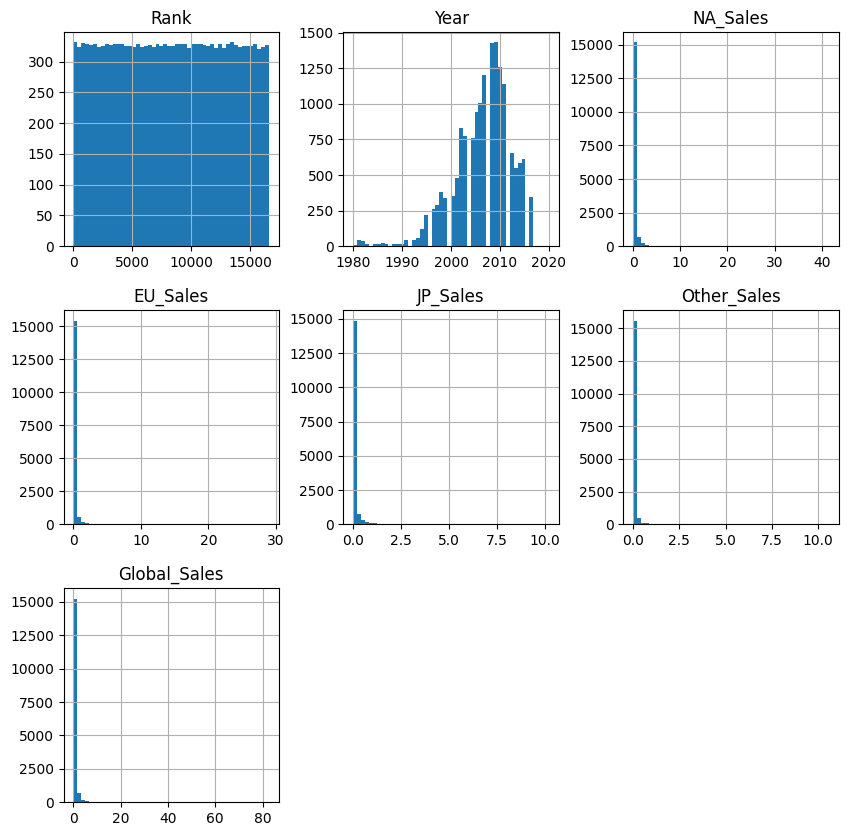

In [5]:
%matplotlib inline
df.hist(bins=50, figsize=(10,10)) #bins-the more the intervals the better the histogram
plt.show()

In [6]:

#Controls the randomness of the data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9598) 
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(11428, 5) (4899, 5) (11428,) (4899,)


In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() #function - realtionship between variables
model.fit(X_train, y_train) #method fits the linear regression model to the training data.



LinearRegression()

In [8]:
# Predict on the training set
y_pred_train = model.predict(X_train) #computes predictions based on the input features (X_train),linear regression used 
print(y_pred_train[:10]) #first 10 lines printed
print(y_train[:10])

# Predict on the testing set
y_pred_test = model.predict(X_test)
print(y_pred_test[:10])
print(y_test[:10])

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

# Calculate metrics on the training set
mae_train = mean_absolute_error(y_train, y_pred_train)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = mse_train ** 0.5

print(f"Training MAE: {mae_train}")
print(f"Training MAPE: {mape_train}")
print(f"Training RMSE: {rmse_train}")

# Calculate metrics on the testing set
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
mse_test = mean_squared_error(y_test, y_pred_test) #MSE is a measure of the average squared difference between predicted values and actual values.
rmse_test = mse_test ** 0.5  

print(f"Testing MAE: {mae_test}")
print(f"Testing MAPE: {mape_test}")
print(f"Testing RMSE: {rmse_test}")

accuracy_test = round((1 - mape_test) * 100, 2) #Rounds the calculated accuracy to two decimal places.
print(f"Accuracy of the linear regression model on the test set is: {accuracy_test}%")


[0.05036512 0.02028666 0.35027141 0.80021624 0.45029282 0.16031896
 1.45030225 0.23033943 0.03034329 0.27035477]
12923    0.05
14983    0.02
5281     0.35
2590     0.80
4351     0.45
8474     0.16
1323     1.45
6957     0.23
14801    0.03
6289     0.27
Name: Global_Sales, dtype: float64
[0.01032013 0.28026898 0.11036855 0.02029483 0.37031481 1.00028829
 0.31038362 0.05037255 0.09033609 1.86012851]
16578    0.01
6203     0.28
10373    0.11
15554    0.02
5110     0.37
2063     1.00
5778     0.31
13330    0.05
11170    0.09
931      1.86
Name: Global_Sales, dtype: float64
Training MAE: 0.002961824781110153
Training MAPE: 0.02901228610749306
Training RMSE: 0.005240323499619238
Testing MAE: 0.002895081688633014
Testing MAPE: 0.02770582988196863
Testing RMSE: 0.005177485757647494
Accuracy of the linear regression model on the test set is: 97.23%


Year_of_Release: 2006
NA_Sales: 3.93
EU_Sales: 1.56
JP_Sales: 0.77
Other_Sales: 0.42
Predicted Global Sales: 6.679613101090107


C:\Users\Manvita\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


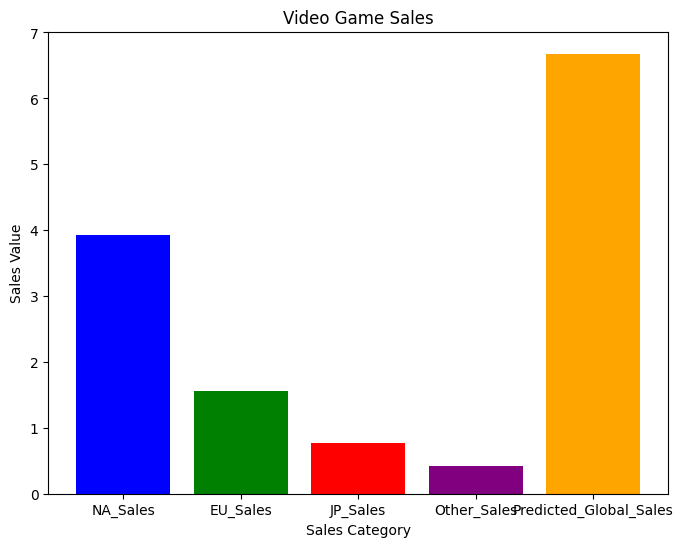

In [9]:



# model = LinearRegression()

def predict_sales(model):
    


    # try:
    Year_of_Release = int(year_entry.get())
    NA_Sales = float(na_sales_entry.get())
    EU_Sales = float(eu_sales_entry.get())
    JP_Sales = float(jp_sales_entry.get())
    Other_Sales = float(other_sales_entry.get())

    print("Year_of_Release:", Year_of_Release)
    print("NA_Sales:", NA_Sales)
    print("EU_Sales:", EU_Sales)
    print("JP_Sales:", JP_Sales)
    print("Other_Sales:", Other_Sales)
#Predict global sales linear regression use krkr
    predicted_sales = model.predict([[Year_of_Release, NA_Sales, EU_Sales, JP_Sales, Other_Sales]])
    print(f"Predicted Global Sales: {predicted_sales[0]}")
#plotting 
    sales_data = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Predicted_Global_Sales']
    sales_values = [NA_Sales, EU_Sales, JP_Sales, Other_Sales, predicted_sales[0]]
    plt.figure(figsize=(8, 6))
    plt.bar(sales_data, sales_values, color=['blue', 'green', 'red', 'purple', 'orange'])
    plt.xlabel('Sales Category')
    plt.ylabel('Sales Value')
    plt.title('Video Game Sales')
    plt.show()
    messagebox.showinfo("Predicted Value",f"Predicted Global Sales: {'{0:.3f}'.format(predicted_sales[0])}")
    root.destroy()
   

root = tk.Tk()
root.title("Video Game Sales Predictor")

year_label = tk.Label(root, text="Year of Release:")
year_entry = tk.Entry(root)
na_sales_label = tk.Label(root, text="NA Sales:")
na_sales_entry = tk.Entry(root)
eu_sales_label = tk.Label(root, text="EU Sales:")
eu_sales_entry = tk.Entry(root)
jp_sales_label = tk.Label(root, text="JP Sales:")
jp_sales_entry = tk.Entry(root)
other_sales_label = tk.Label(root, text="Other Sales:")
other_sales_entry = tk.Entry(root)

predict_button = tk.Button(root, text="Predict", command=lambda: predict_sales(model))
result_label = tk.Label(root, text="")
#layout widgets
year_label.grid(row=0, column=0)
year_entry.grid(row=0, column=1)
na_sales_label.grid(row=1, column=0)
na_sales_entry.grid(row=1, column=1)
eu_sales_label.grid(row=2, column=0)
eu_sales_entry.grid(row=2, column=1)
jp_sales_label.grid(row=3, column=0)
jp_sales_entry.grid(row=3, column=1)
other_sales_label.grid(row=4, column=0)
other_sales_entry.grid(row=4, column=1)
predict_button.grid(row=5, columnspan=2)
result_label.grid(row=6, columnspan=2)

root.mainloop() #Start the main event loop


In [10]:

from sklearn.ensemble import RandomForestRegressor #predict a continuous numeric value.
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train, y_train)
RandomForestRegressor(max_depth=2, random_state=0)

# R2 score milta hai decsion tree
regr.score(X_train, y_train)

0.8515948529452855

In [11]:

y_predicted = regr.predict(X_test)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score# Train RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X, y)

# Predict on the entire dataset
y_pred = regr.predict(X)

# Calculate metrics hoti hai
r2 = r2_score(y, y_pred)
mae = mean_absolute_error(y, y_pred)
mse = mean_squared_error(y, y_pred)
rmse = mse ** 0.5

print(f"R²: {r2}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")

R²: 0.8541296667068643
MAE: 0.3005701893290336
RMSE: 0.5979812743022599


In [13]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier # Imports the k-nearest neighbors classifier from scikit
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, precision_score, accuracy_score


y = df['Global_Sales'] > df['Global_Sales'].median()  # Convert to binary classification problem hota hai idhar,aafter define
X = df[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]

knn = KNeighborsClassifier(n_neighbors=5)

kf = KFold(n_splits=5, shuffle=True, random_state=42) #data is shuffled

accuracy_scores = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')  #5-fold cross-validation  and calculates accuracy for each fold 

precision_scores = cross_val_score(knn, X, y, cv=kf, scoring=make_scorer(precision_score))

print(f'Accuracy scores for each fold: {accuracy_scores}')
print(f'Precision scores for each fold: {precision_scores}')

print(f'Mean accuracy score: {accuracy_scores.mean()}')
print(f'Mean precision score: {precision_scores.mean()}')



Accuracy scores for each fold: [0.9816289  0.98224127 0.98683002 0.98836141 0.98192956]
Precision scores for each fold: [0.98358586 0.98710866 0.99186992 0.9925     0.98804279]
Mean accuracy score: 0.9841982315358292
Mean precision score: 0.9886214454224367
